# Regression Analysis using Linear Algebra and NumPy 

## Introduction

In the previous sections, you learned that in statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between data entities (variables). Linear regression is an important predictive analytical tool in the data scientist's toolbox. Here, you'll try and develop a basic intuition for regression from a linear algebra perspective using vectors and matrix operations. This lesson covers least-squares regression with matrix algebra without digging deep into the geometric dimensions. 

[You can find a deeper mathematical and geometric explanation of the topic here](http://math.mit.edu/~gs/linearalgebra/ila0403.pdf). In this lesson, we'll try to keep things more data-oriented.

## Objectives

You will be able to: 

- Apply linear algebra to fit a function to data, describing linear mappings between input and output variables
- Indicate how linear algebra is related to regression modeling


## Regression analysis

By now, you know that the purpose of the regression process is to fit a mathematical model to a set of observed points, in order to later use that model for predicting new values e.g. predicting sales, based on historical sales figures, predicting house prices based on different features of the house, etc. 

Let's use a very simple toy example to understand how this works with linear algebra. Say you are collecting data on total number of sales per day for some business. Imagine you've got three data points in the format: 

(day, total number of sales(in hundreds)) 

> (1, 1) , (2, 2) , (3, 2)

If we plot these points on a scatter plot with day (x-axis) vs. sales figures (y-axis), this is what we get:

```python
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,2])
               
plt.plot(x, y, 'o')
plt.xticks(x)

plt.show()
```

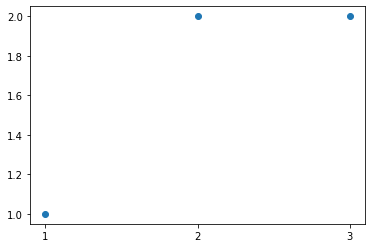

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,2])

plt.plot(x, y, 'o')
plt.xticks(x)

plt.show()

## Fitting a model to data - A quick refresher

The purpose of linear regression would be to fit a mathematical model (a straight line) in the parameter space  that best describes the relationship between day and sales. Simple linear regression attempts to fit a line (in a 2-dimensional space) to describe the relationship between two variables as shown in the example below:

<img src ="images/new_regr_line.png" width="500">


Following this, if you were to identify a relationship between the day and total number of sales, the goal would be to seek a function that describes this line and allows us to linearly map input data points (day) or **independent variable** to outcome values (sales) or **dependent variable**.  If you do this, you first assume that there is an underlying relationship that maps “days” uniquely to “number of sales”, that can be written in the function form as an equation of the straight line i.e. 


$$y = mx+c$$


where $c$ is the intercept of the line and $m$ denotes the slope, as shown below: 

<img src="images/new_regression.png" width ="400">



We can write the fitting function based on the above as sales being a **function** of days.

$$ \text{sales} = f(\text{days})$$


or, from $y= mx+c$

$$\text{sales} = \text{days}*x + \text{intercept} $$
>(where **y** is the number of sales per day and **x** represents the day. **c** (intercept) and **m** (slope) are the regression coefficients we are looking for hoping that these co-efficients will linearly map **day** to the **number of sales**). 

So using this, we can show our three data points ((1, 1) , (2, 2) , (3, 2)) as:

> $c + m*1 = 1$

> $c + m*2 = 2$

> $c + m*3 = 2$


We can see that our data points do not lie on a line. The first two points make a perfect linear system. When $x = 1$, $y = 1$; and when $x = 2$, $y = 2$ i.e. we can draw a straight line passing through these points. When x = 3, b = 2, you know the three points do not lie on the same line as first two points, and our model will be an **approximation** i.e. 
> there will be some error between the straight line and the REAL relationship between these parameters. 

This behavior can be simulated by using NumPy's `polyfit()` function (similar to `statsmodels.ols`) to draw a regression line to the data points as shown below. [Here is the documentation for np.polyfit()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html). 

```python
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get c(intercept) and m(slope)
# the degree parameter = 1 to models this as a straight line
c, m = polyfit(x, y, 1)

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'o')
plt.plot(x, c + (m * x), '-')
plt.xticks(x)

plt.show()
print(b,m)
```

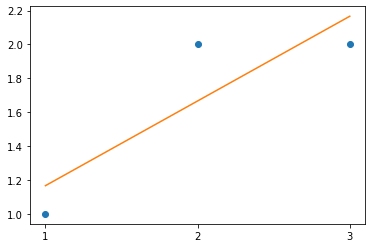

0.6666666666666667 0.5000000000000001


In [3]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get c(intercept) and m(slope)
# the degree parameter = 1 to models this as a straight line
c, m = polyfit(x, y, 1)

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'o')
plt.plot(x, c + (m * x), '-')
plt.xticks(x)

plt.show()
print(c,m)